In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [3]:
df = pd.read_csv("lung cancer data.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
# Basic Info About the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Statistical Summary
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
# Check for Null/Missing Values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**the datset is cleaned there is no null/missing value present in this dataset**

In [8]:
# Check for Duplicates
df.duplicated().sum()

33

In [9]:
df.drop_duplicates(inplace=True)

**duplicateD VALUE removed**

In [11]:
# Understand Categorical Features
df.select_dtypes(include='object').nunique()


GENDER         2
LUNG_CANCER    2
dtype: int64

In [12]:
# Check Target Variable Balance
df['LUNG_CANCER'].value_counts(normalize=True)


LUNG_CANCER
YES    0.862319
NO     0.137681
Name: proportion, dtype: float64

In [13]:
# Clean Column Names
df.columns = df.columns.str.strip().str.upper().str.replace(' ', '_')

# Encode Categorical Variables


In [15]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['GENDER', 'LUNG_CANCER']

# convert category columns to numbers using Label Encoding:

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df[col]

0      1
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    0
283    1
Name: LUNG_CANCER, Length: 276, dtype: int32

# Scale the Numerical Features
**Scaling ensures features are on the same level (important for algorithms like SVM or Logistic Regression).**

In [19]:
from sklearn.preprocessing import StandardScaler

X = df.drop('LUNG_CANCER', axis=1)  # thats Features
y = df['LUNG_CANCER']               # thats  Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.97142265,  0.72817582, -1.09108945, ...,  0.76564149,
         1.06748999,  0.89006056],
       [ 0.97142265,  1.32596442,  0.91651514, ...,  0.76564149,
         1.06748999,  0.89006056],
       [-1.02941804, -0.46740138, -1.09108945, ...,  0.76564149,
        -0.93677693,  0.89006056],
       ...,
       [ 0.97142265, -0.94563226,  0.91651514, ...,  0.76564149,
        -0.93677693,  0.89006056],
       [ 0.97142265, -2.02165174, -1.09108945, ..., -1.30609431,
         1.06748999,  0.89006056],
       [ 0.97142265, -0.34784366, -1.09108945, ...,  0.76564149,
         1.06748999,  0.89006056]])

In [20]:
# Save Preprocessed Data
preprocessed_df = pd.DataFrame(X_scaled, columns=X.columns)
preprocessed_df['LUNG_CANCER'] = y.values
preprocessed_df.to_csv('preprocessed_lung_cancer.csv', index=False)


# Exploratory Data Analysis 
**the part where we vibe check the data visually **

# Target Variable Distribution (LUNG_CANCER)

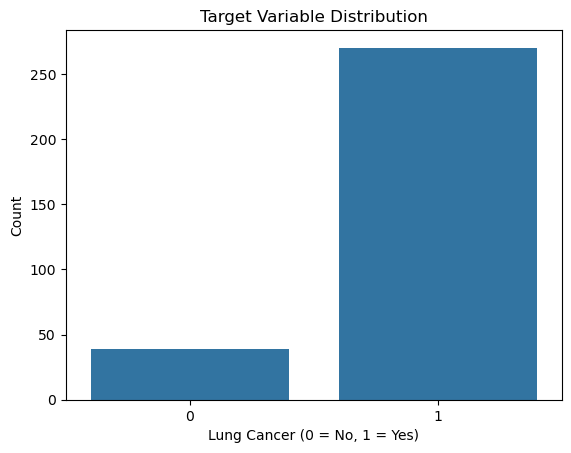

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.savefig('target_variable_distribution.png')
plt.show()


#  Gender vs Lung Cancer

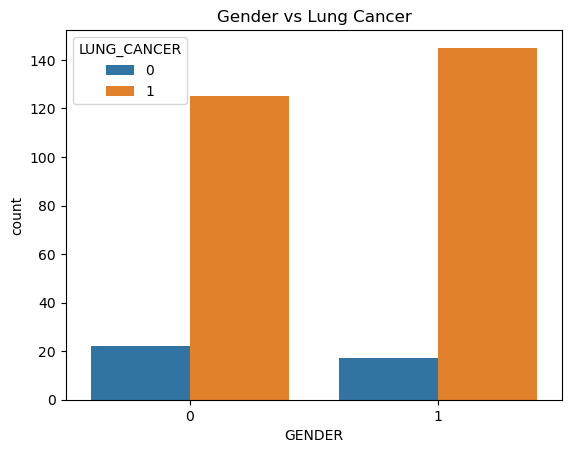

In [86]:
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Gender vs Lung Cancer')
plt.savefig('gender_vs_lung_cancer.png')
plt.show()


# Smoking vs Lung Cancer

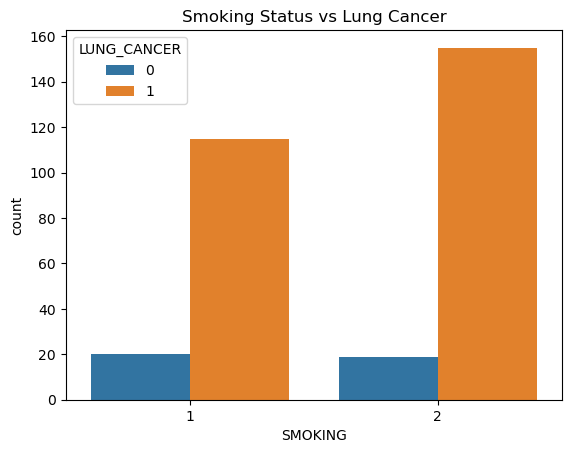

In [82]:
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Smoking Status vs Lung Cancer')
plt.savefig('smoking_vs_lung_cancer.png')
plt.show()


# Age Distribution by Cancer Status

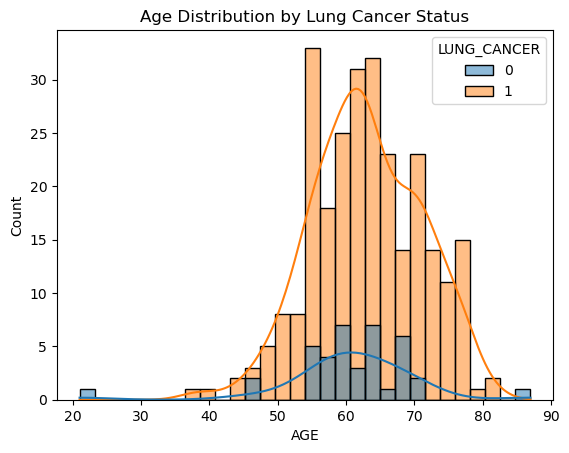

In [78]:
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', kde=True, bins=30)
plt.title('Age Distribution by Lung Cancer Status')
plt.savefig('age_distribution_lung_cancer.png')
plt.show()


# Correlation Heatmap

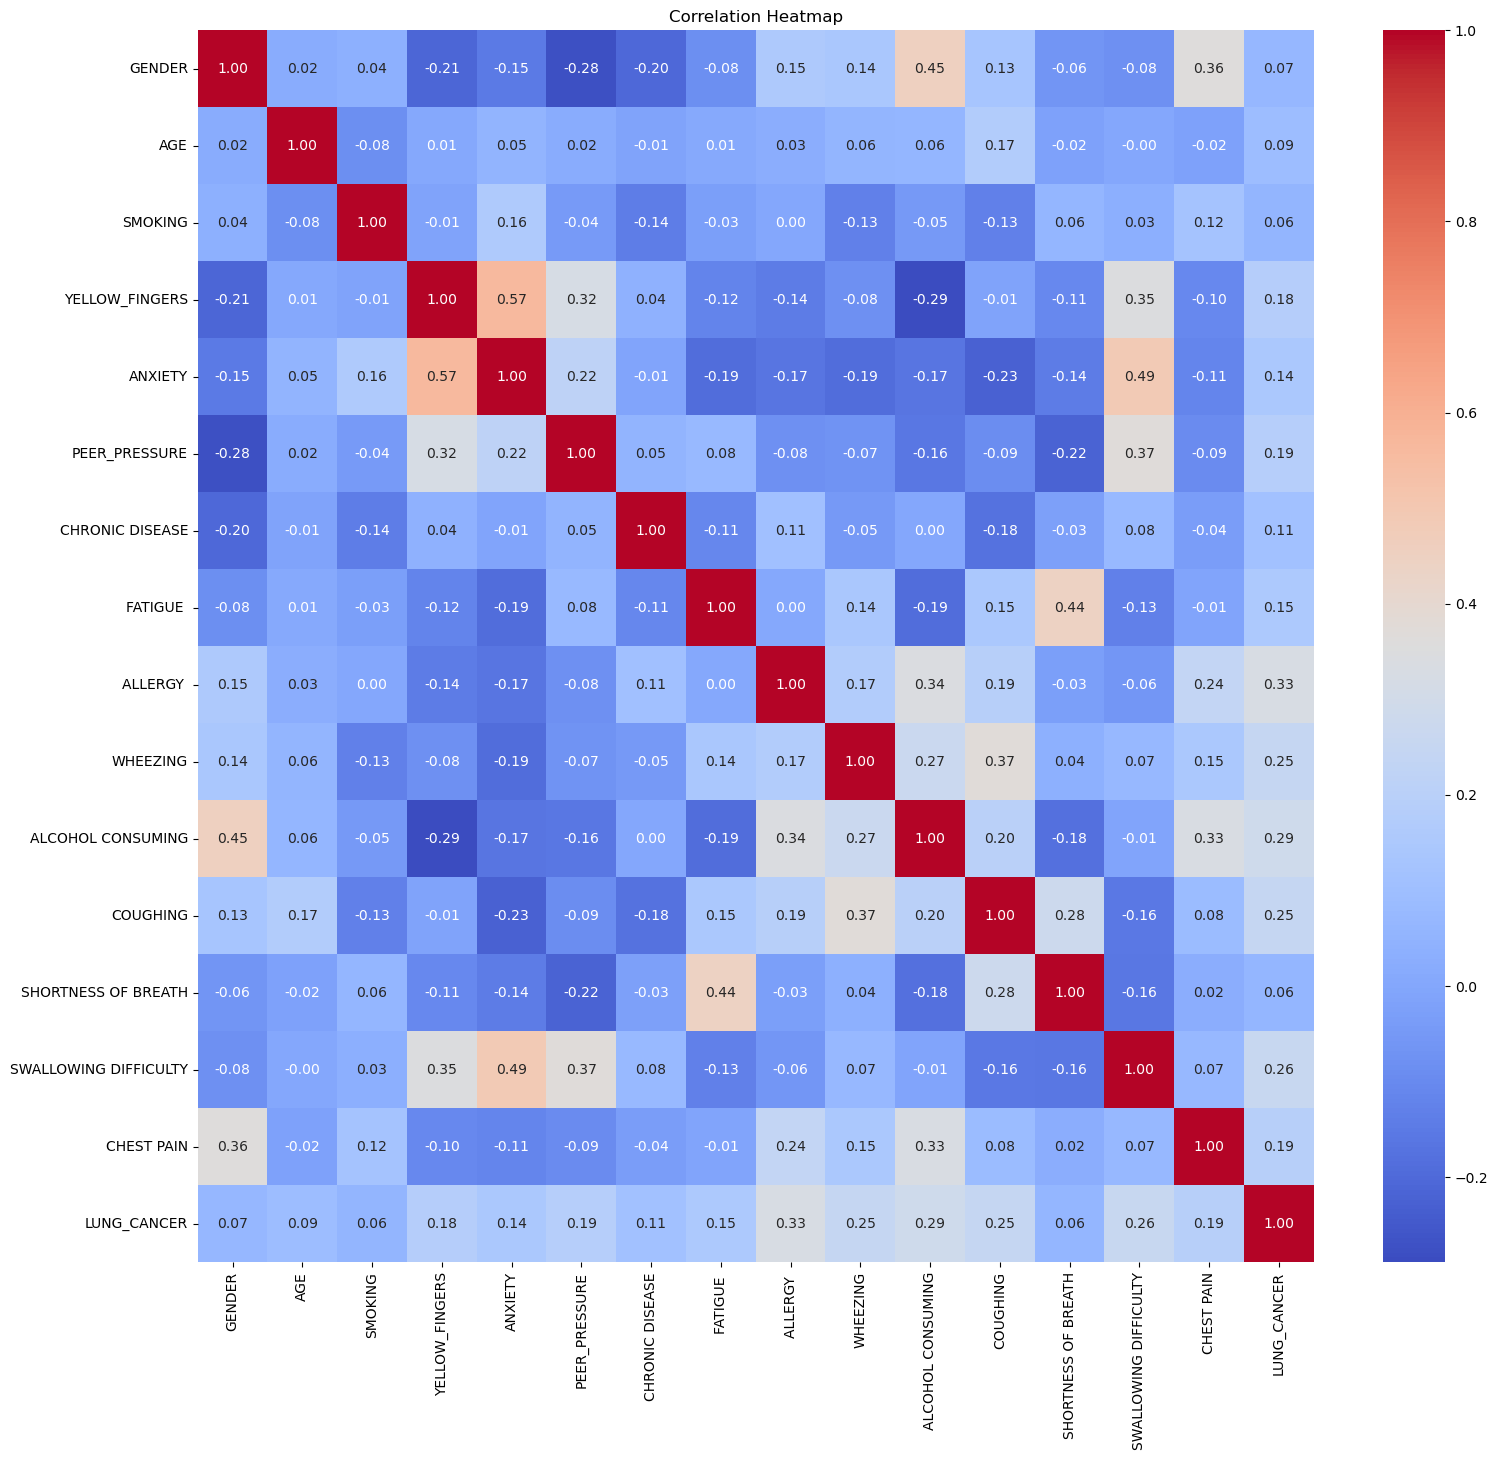

In [74]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png')
plt.show()


# Pair Plot

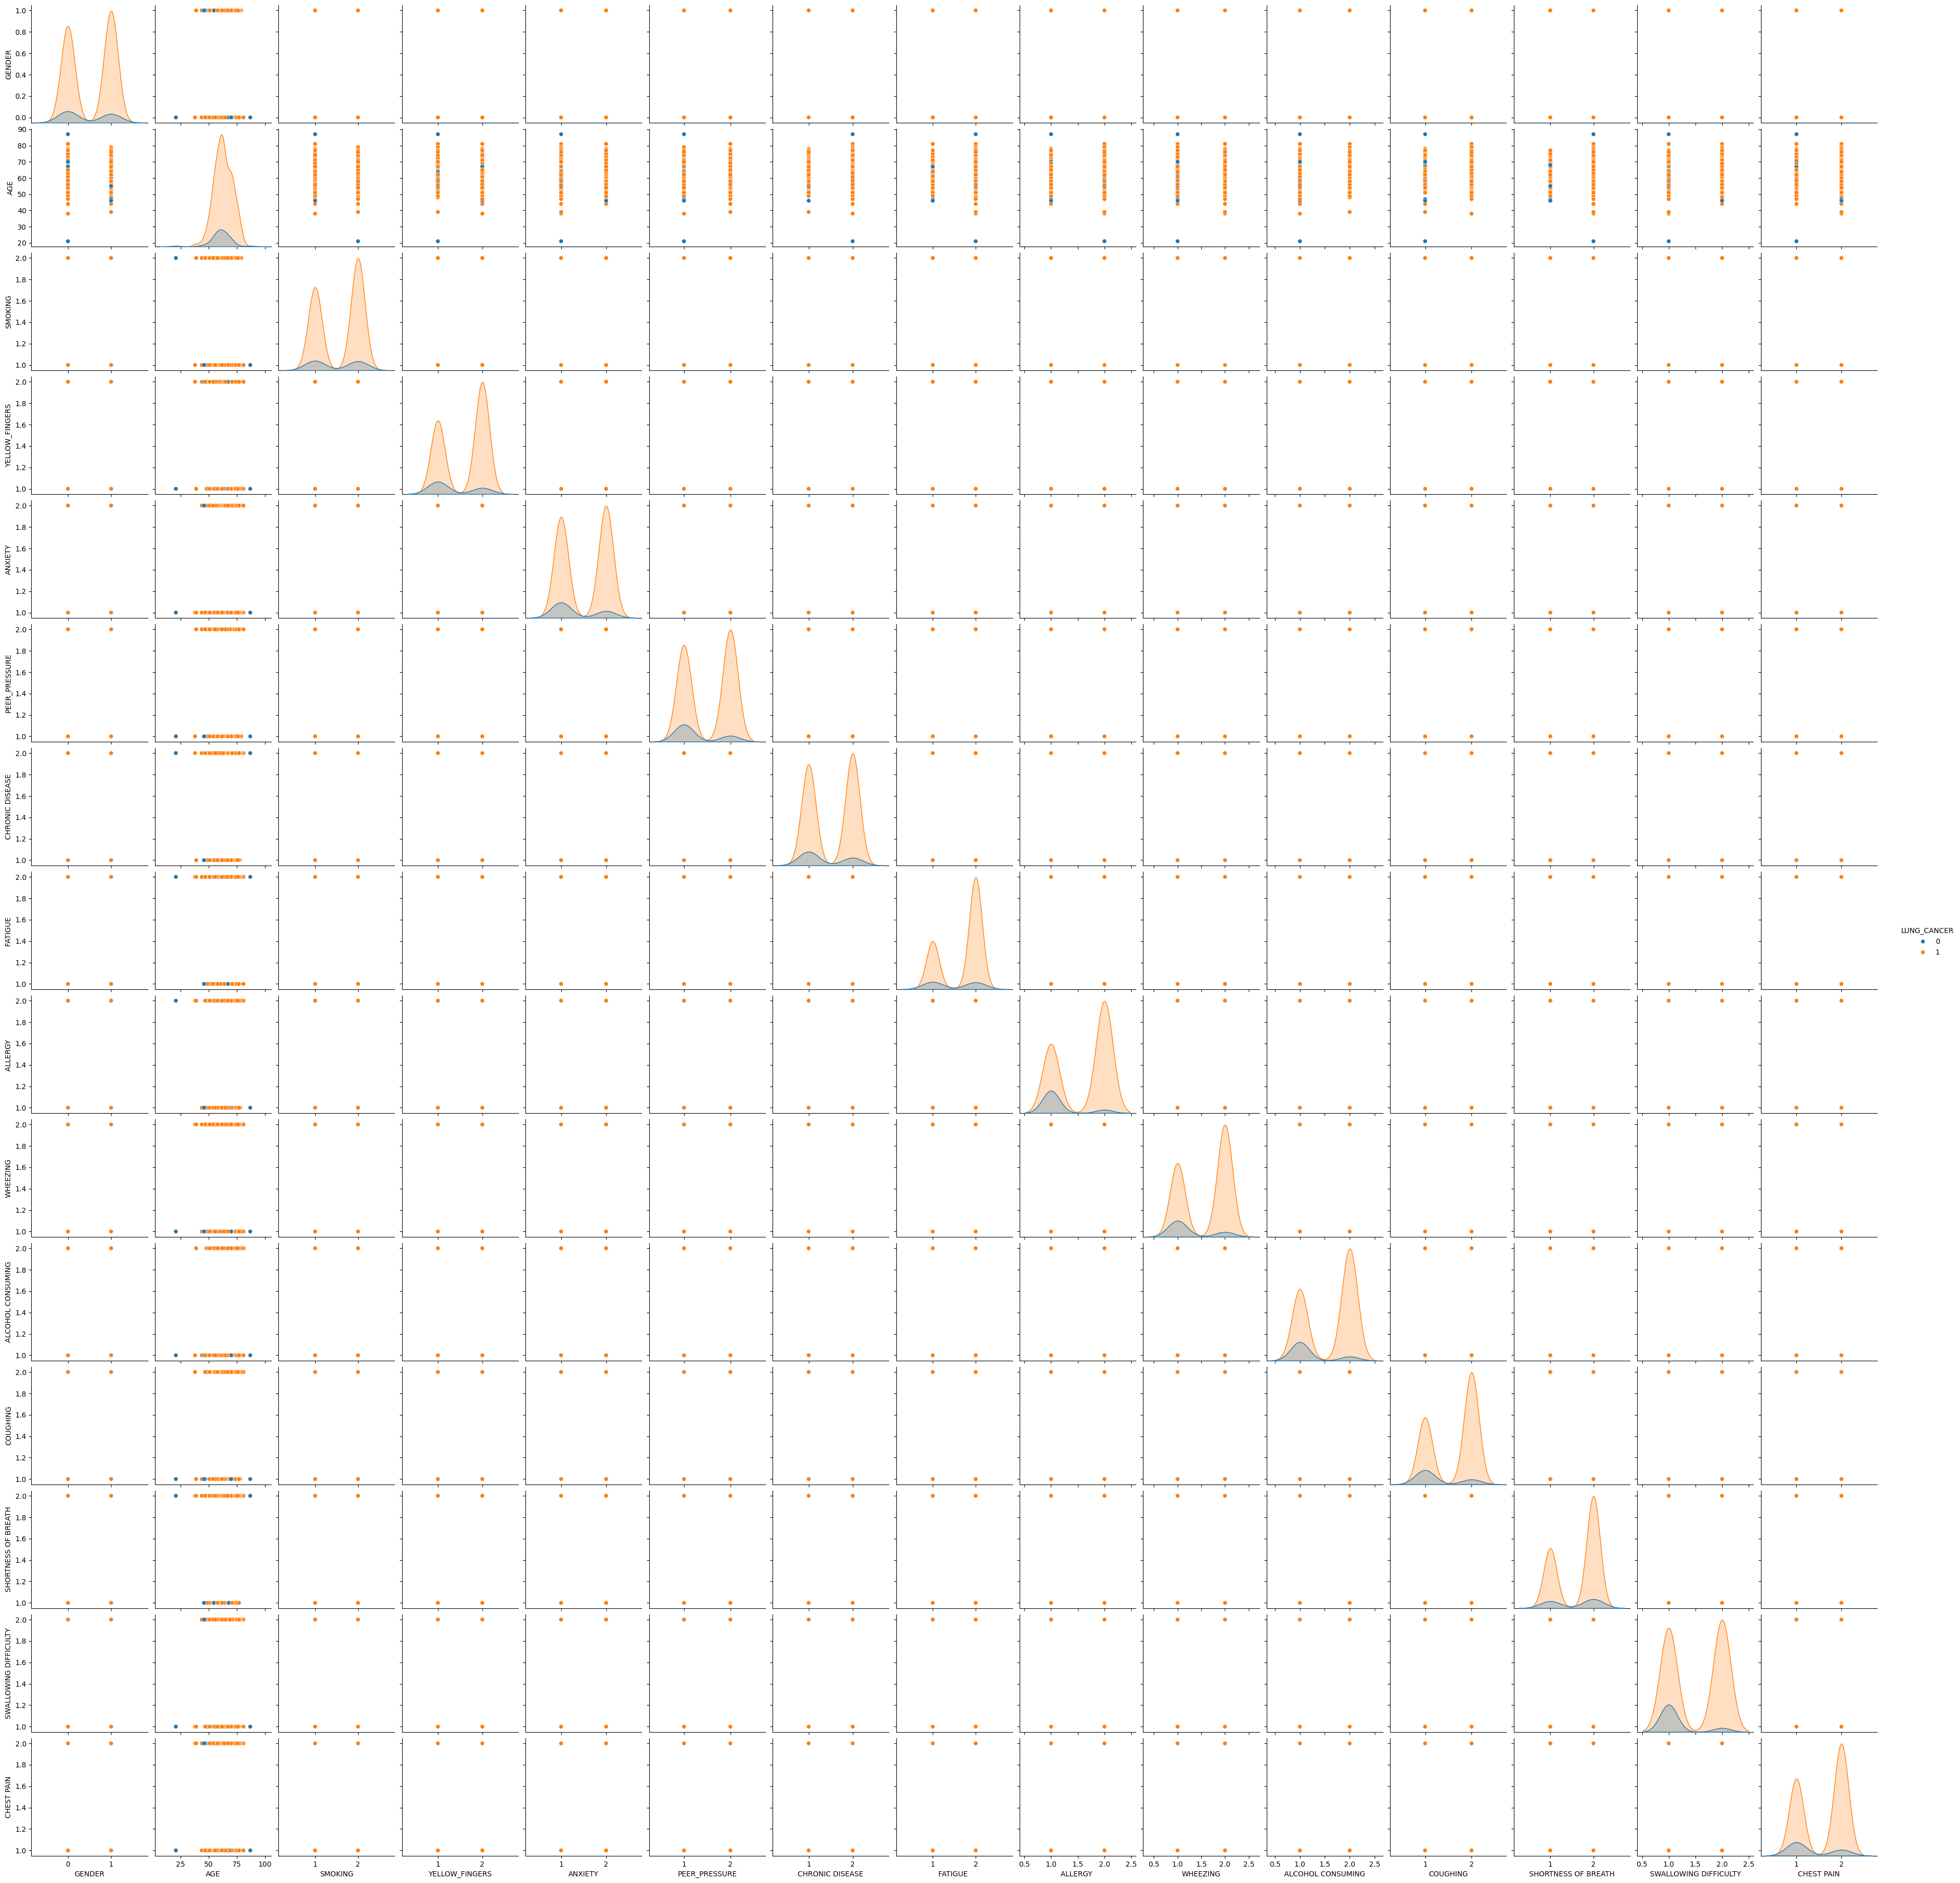

In [90]:
sns.pairplot(df, hue='LUNG_CANCER')
plt.savefig('pairplot_lung_cancer.png')
plt.show()


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

# Load dataset
df = pd.read_csv("lung cancer data.csv")

# Encode categorical features
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

# Features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
with open("lung_cancer_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as lung_cancer_model.pkl")


✅ Model saved as lung_cancer_model.pkl
